In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor


# https://www.kaggle.com/datasets/utsavdey1410/food-nutrition-dataset


In [ ]:
df1 = pd.read_csv('FOOD-DATA-GROUP1.csv')
df1

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.900,1.300,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.900,4.900,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.300,0.900,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.300,0.500,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.400,0.600,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,546,546,chinook salmon smoked,159,5.9,1.300,2.800,1.400,0.0,0.000,...,15.000,0.300,1.200,24.500,0.055,223.000,238.0,0.027,0.400,47.038
547,547,547,cisco smoked,50,3.4,0.500,1.600,0.600,0.0,0.000,...,7.400,0.015,0.100,4.800,0.047,42.500,82.9,0.050,0.076,15.576
548,548,548,haddock smoked,33,0.3,0.049,0.006,0.055,0.0,0.000,...,13.900,0.001,0.400,15.300,0.075,71.000,117.4,0.063,0.100,21.719
549,549,549,whitefish smoked,147,1.3,0.300,0.400,0.400,0.0,0.000,...,24.500,0.400,0.700,31.300,0.091,179.500,575.3,0.030,0.700,58.398


In [ ]:
df2 = pd.read_csv('FOOD-DATA-GROUP2.csv')
df2

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,eggnog,224,10.6,6.6,3.3,0.5,20.4,20.4,...,330.2,0.051,0.500,48.3,0.024,276.9,419.1,0.094,1.200,377.200
1,1,1,beer light,96,0.0,0.0,0.0,0.0,5.4,0.3,...,13.2,0.095,0.014,16.5,0.094,39.6,69.3,0.077,0.044,19.456
2,2,2,beer budweiser,12,0.0,0.0,0.0,0.0,0.9,0.0,...,1.2,0.095,0.000,2.1,0.038,3.8,9.7,0.000,0.000,2.200
3,3,3,weizenbier erdinger,220,18.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,18.000
4,4,4,beer light budweiser,9,0.0,0.0,0.0,0.0,0.4,0.0,...,0.9,0.088,0.000,2.1,0.007,3.2,7.7,0.000,0.000,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,314,fontina cheese,420,33.6,20.7,9.4,1.8,1.7,1.7,...,594.0,0.087,0.200,15.1,0.030,373.7,69.1,0.052,3.800,657.400
315,315,315,monterey cheese low fat,350,24.4,15.9,6.4,0.9,0.8,0.6,...,796.7,0.089,0.800,30.5,0.000,501.7,91.5,0.030,3.400,854.800
316,316,316,colby cheese,445,36.3,22.8,10.5,1.1,2.9,0.6,...,774.1,0.047,0.900,29.4,0.010,516.4,143.5,0.023,3.500,841.300
317,317,317,american cheese,93,7.9,4.5,2.1,0.3,0.9,0.6,...,261.3,0.034,0.200,6.5,0.086,160.3,33.0,0.014,0.600,274.886


In [ ]:
df3 = pd.read_csv('FOOD-DATA-GROUP3.csv')
df3

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,nectarine,66,0.500,0.066,0.100,0.200,15.8,11.8,...,0.081,9.000,0.100,0.4,13.500,0.002,39.0,301.500,0.000,20.735
1,1,1,kiwifruit gold,51,0.200,0.008,0.099,0.051,12.8,10.0,...,13.800,0.100,0.200,9.7,0.072,20.300,255.2,0.003,0.077,159.686
2,2,2,prickly pear raw,8,0.072,0.000,0.000,0.000,1.9,0.2,...,34.200,0.051,0.021,13.1,0.100,2.100,24.7,0.023,0.073,39.263
3,3,3,pineapple,45,0.100,0.074,0.001,0.087,11.8,8.9,...,0.061,11.700,0.091,0.3,10.800,0.800,7.2,98.100,0.061,13.970
4,4,4,rowan,253,4.600,0.600,0.000,0.000,54.5,32.1,...,34.200,2.400,5.000,73.0,0.400,118.600,298.7,0.000,1.000,176.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,566,turkey wing cooked,426,23.100,6.300,8.700,5.500,0.0,0.0,...,44.600,0.100,2.700,46.5,0.050,366.400,494.8,0.026,3.900,121.300
567,567,567,goose meat raw,6077,550.700,160.200,291.100,61.600,0.0,0.0,...,196.600,4.400,41.000,294.8,0.300,3832.900,5045.0,0.200,28.200,1117.200
568,568,568,turkey breast roasted,3266,128.000,36.300,42.300,31.100,0.0,0.0,...,362.900,0.800,24.200,466.6,0.300,3628.800,4976.6,0.500,35.100,1011.200
569,569,569,chicken fajita strips,13,0.500,0.200,0.200,0.100,0.2,0.0,...,1.200,0.034,0.097,2.1,0.099,26.000,26.7,0.018,0.100,3.660


In [ ]:
df4 = pd.read_csv('FOOD-DATA-GROUP4.csv')
df4

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,chocolate pudding fat free,105,0.3,0.000,0.000,0.000,23.6,17.800,...,44.100,0.035,1.900,17.0,0.040,61.00,235.0,0.052,0.300,72.400
1,1,1,tapioca pudding,143,4.3,1.100,2.800,0.088,23.9,16.400,...,78.100,0.026,0.100,6.6,0.096,66.00,101.2,0.000,0.200,108.800
2,2,2,tapioca pudding fat free,105,0.4,0.100,0.080,0.067,23.9,15.900,...,58.200,0.004,0.100,5.6,0.023,73.90,78.4,0.000,0.200,84.500
3,3,3,rice pudding,122,2.4,1.400,0.600,0.100,20.8,13.100,...,0.063,107.400,0.014,0.1,9.000,0.10,92.7,141.300,0.083,27.329
4,4,4,corn pudding,328,12.6,6.300,3.900,1.400,42.4,16.500,...,0.066,97.500,0.100,1.3,37.500,0.20,225.0,440.000,0.069,69.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,227,muesli master crumble,124,2.4,1.000,19.800,8.500,4.5,0.042,...,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,9.300
228,228,228,bran flakes,131,0.8,0.200,0.100,0.500,32.2,7.400,...,0.025,17.600,0.300,11.2,91.600,1.40,179.6,213.200,0.083,45.358
229,229,229,nut cereal,245,5.9,1.000,3.900,0.500,46.2,17.200,...,75.600,0.200,10.300,39.0,1.000,106.80,134.4,0.066,3.000,156.500
230,230,230,corn flakes,108,0.3,0.098,0.071,0.018,24.6,2.200,...,0.000,0.600,0.083,5.4,2.000,0.06,9.2,30.000,0.077,27.947


In [ ]:
df5 = pd.read_csv('FOOD-DATA-GROUP5.csv')
df5

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.800,1.900,5.600,2.000,0.073,0.000,...,2.8,0.001,0.027,0.300,0.000,2.200,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.800,0.700,6.200,1.600,3.700,1.700,...,10.2,0.300,0.700,49.800,0.300,106.600,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.600,1.000,10.600,1.400,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.000,66.300,58.200,74.500,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.600,3.100,6.400,3.100,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,17.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.700,0.000,...,15.8,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
718,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.200,0.034,...,0.0,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
719,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.700,0.096,...,0.0,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
720,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.300,2.200,...,2.6,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [ ]:
df = pd.concat([df1,df2,df3,df4,df5] , ignore_index=True)
df

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [ ]:
df.drop(["Unnamed: 0.1" ,"Unnamed: 0"] , inplace=True , axis=1)

In [ ]:
df

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [ ]:
df.columns

Index(['food', 'Caloric Value', 'Fat', 'Saturated Fats',
       'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates',
       'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
       'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc',
       'Nutrition Density'],
      dtype='object')

In [ ]:
df.columns

Index(['food', 'Caloric Value', 'Fat', 'Saturated Fats',
       'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates',
       'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
       'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc',
       'Nutrition Density'],
      dtype='object')

In [ ]:
df.describe()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,62.171937,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,385.352876,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,0.000000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,0.000000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,26.450000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [ ]:
food = df.iloc[: ,0 ]

In [ ]:
food

0                           cream cheese
1                      neufchatel cheese
2       requeijao cremoso light catupiry
3                         ricotta cheese
4                   cream cheese low fat
                      ...               
2390                            jews ear
2391                     enoki mushrooms
2392                     morel mushrooms
2393            portabella mushrooms raw
2394                     oyster mushroom
Name: food, Length: 2395, dtype: object

In [ ]:
df.drop(["food"] , inplace=True , axis=1)

In [ ]:
df.isna().sum()

Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64

In [ ]:
df

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,0.0,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,0.0,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,0.0,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,0.0,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [ ]:
df.drop_duplicates(inplace=True)

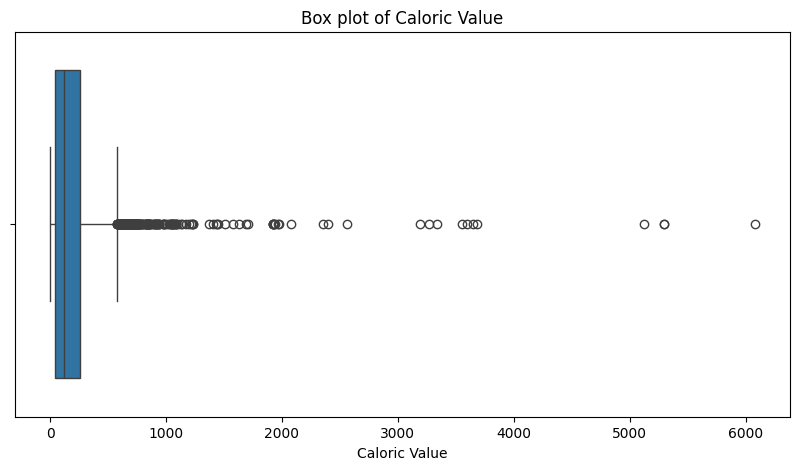

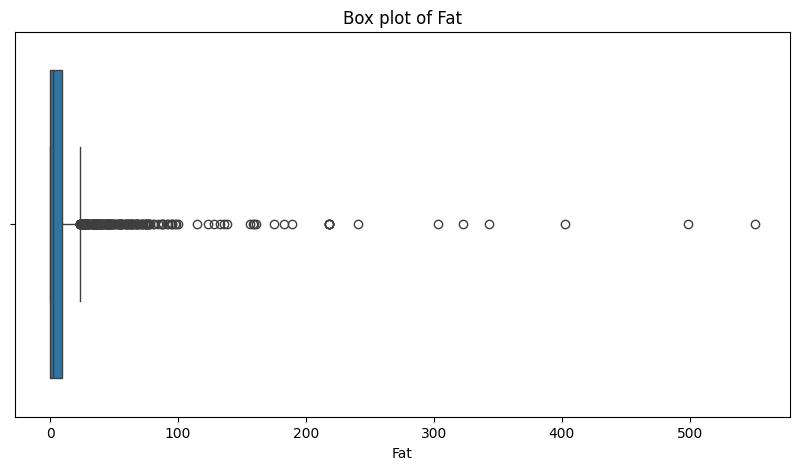

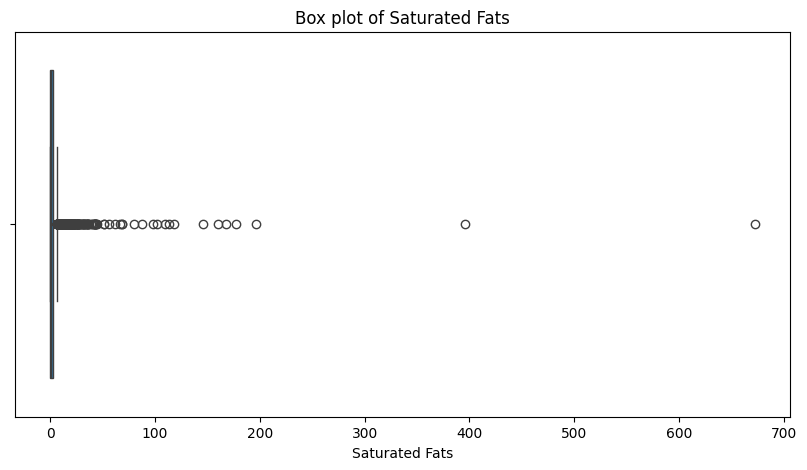

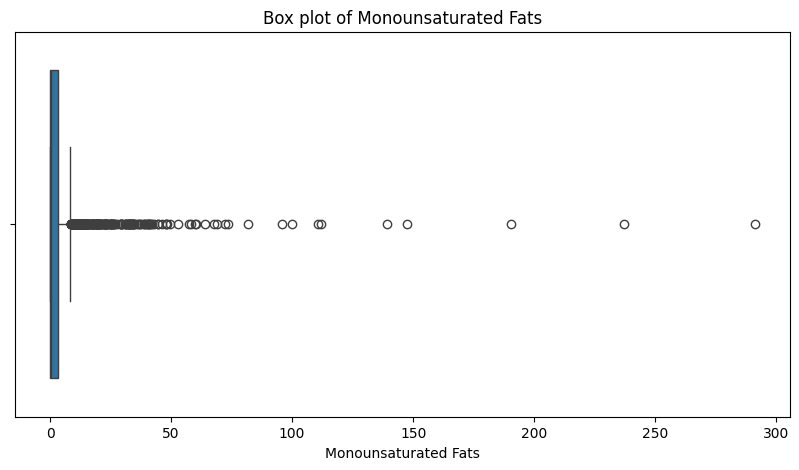

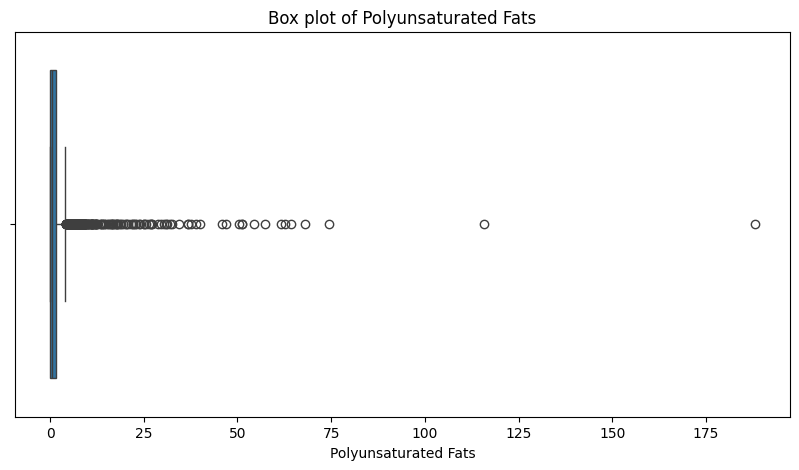

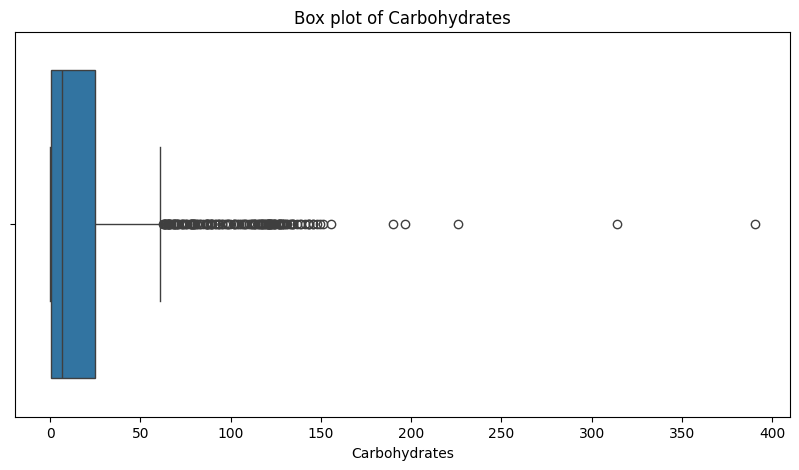

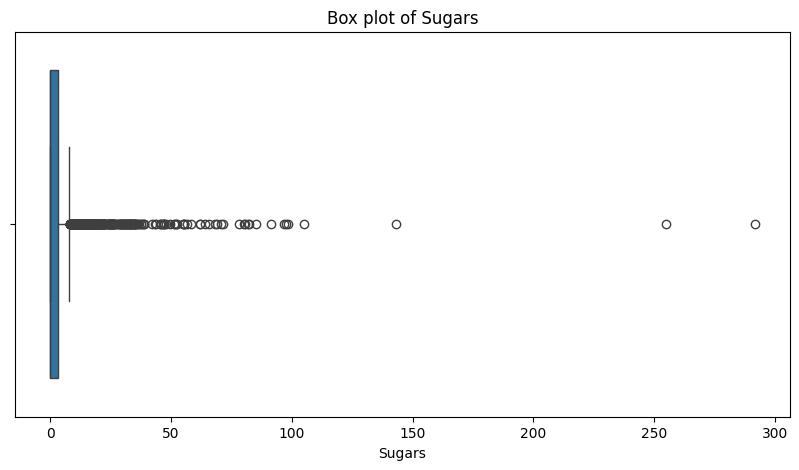

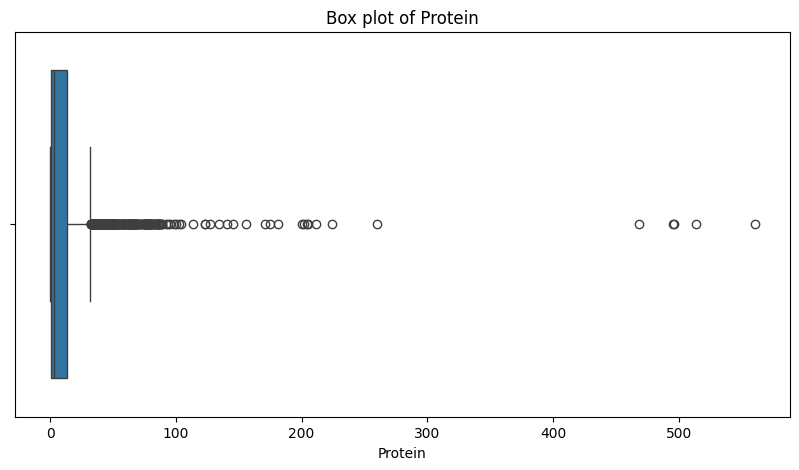

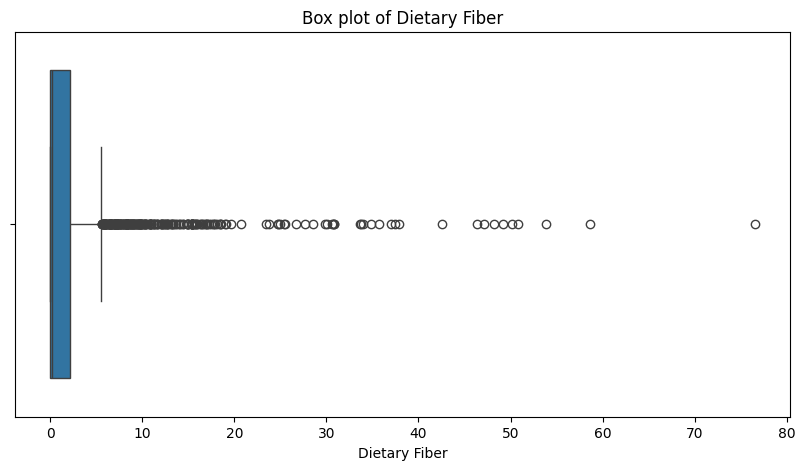

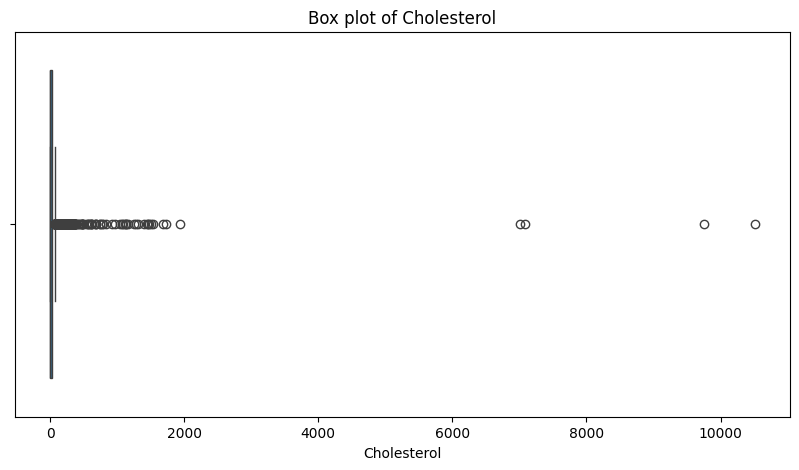

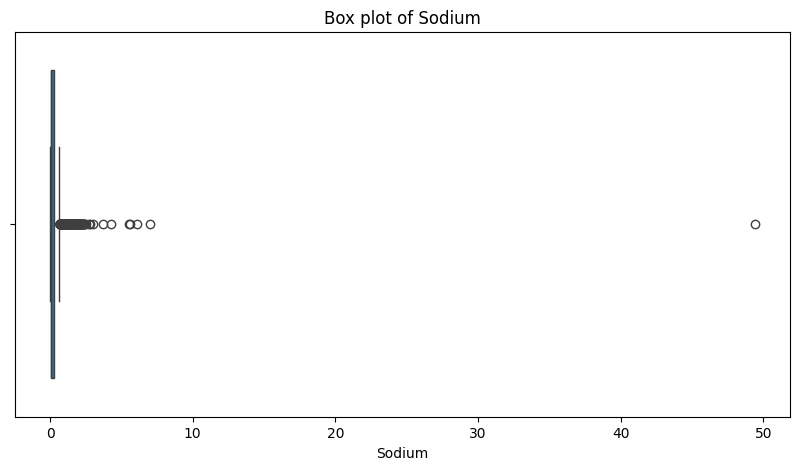

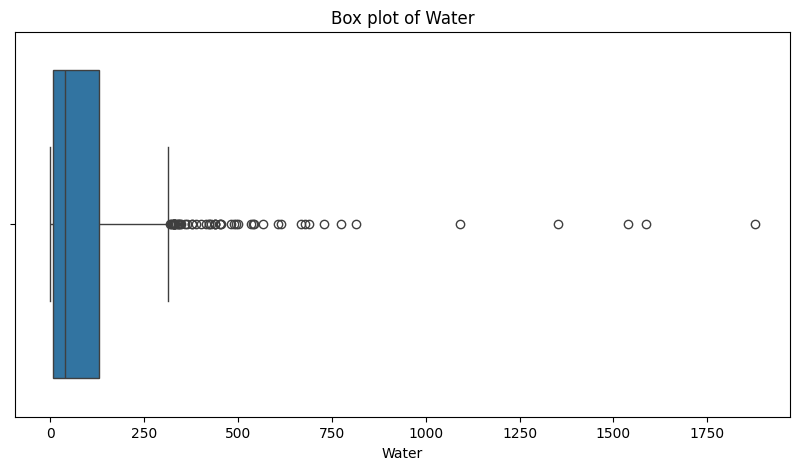

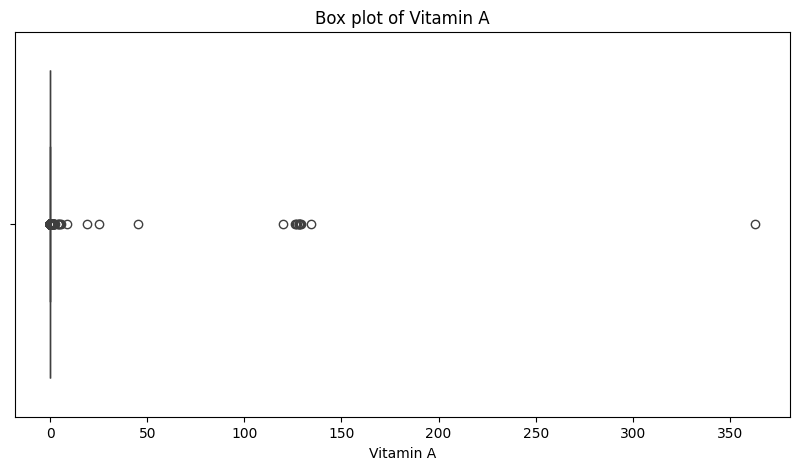

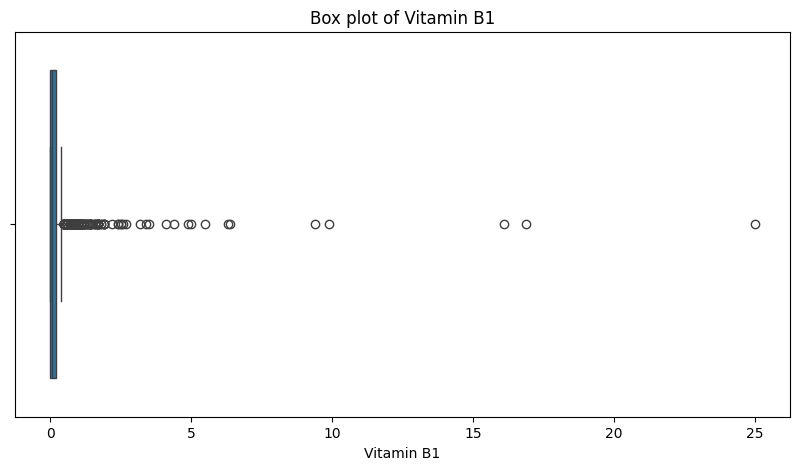

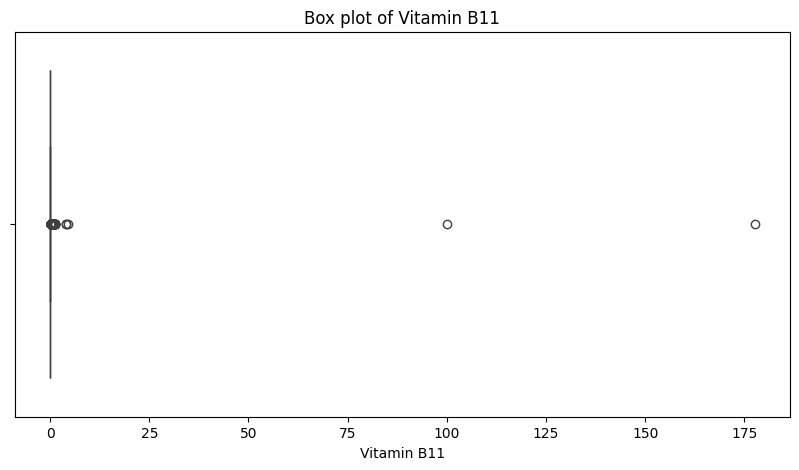

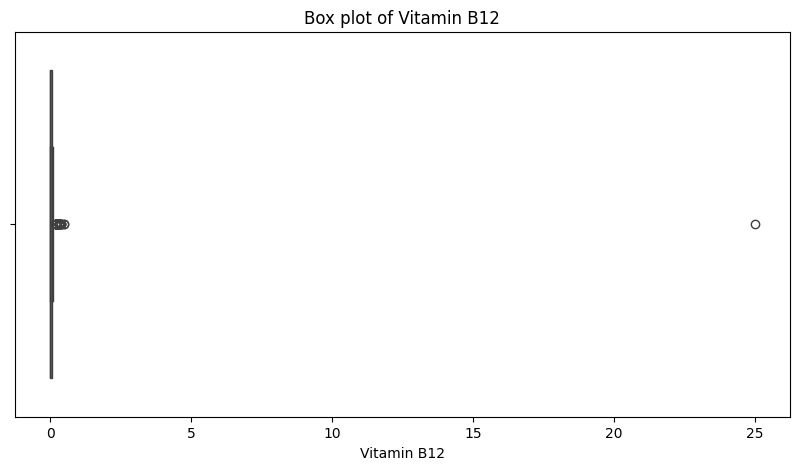

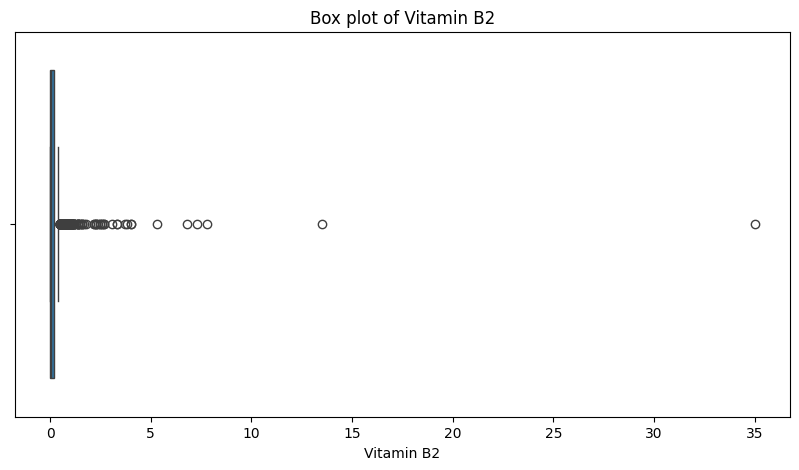

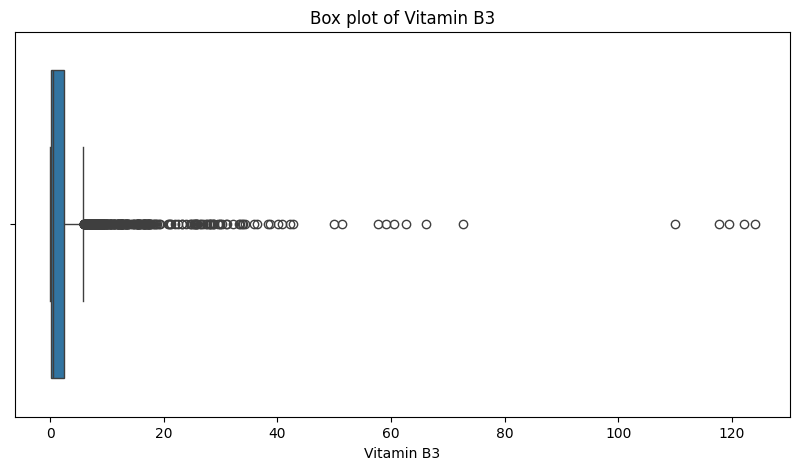

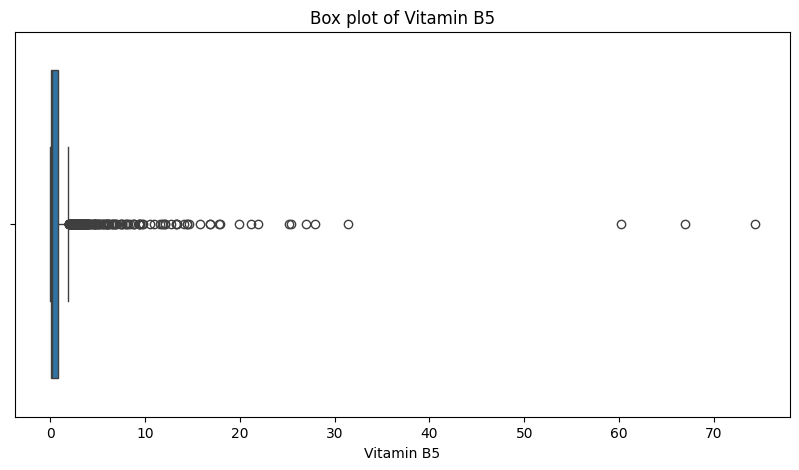

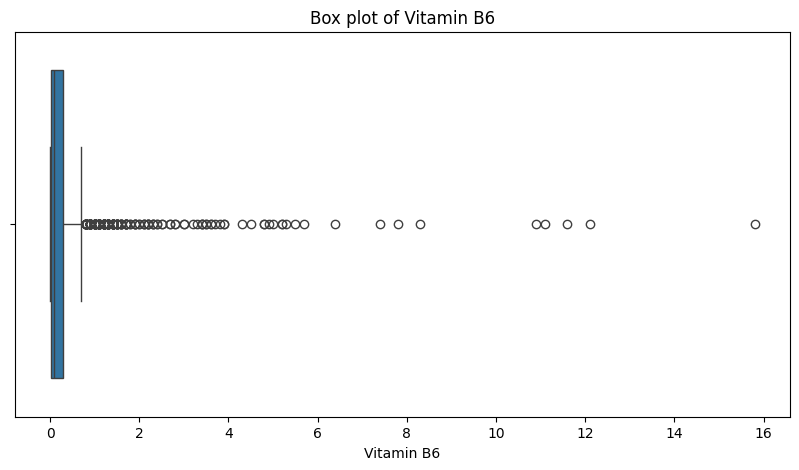

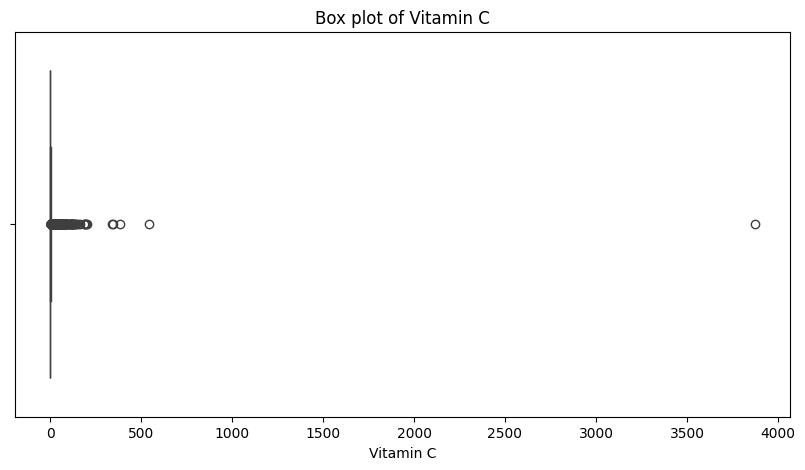

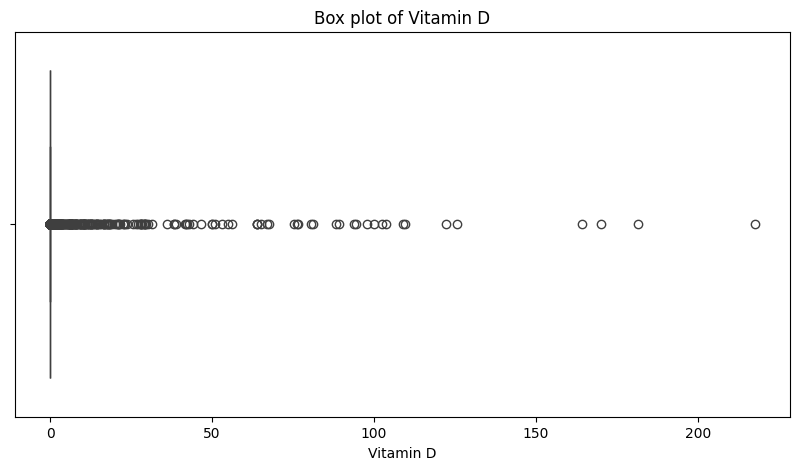

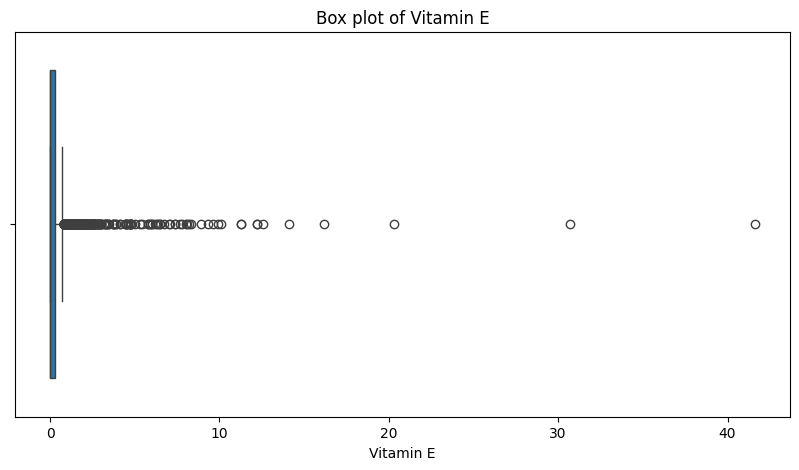

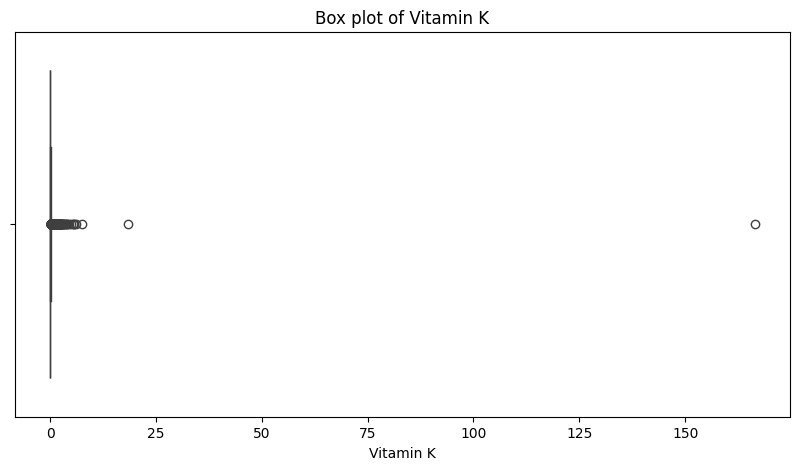

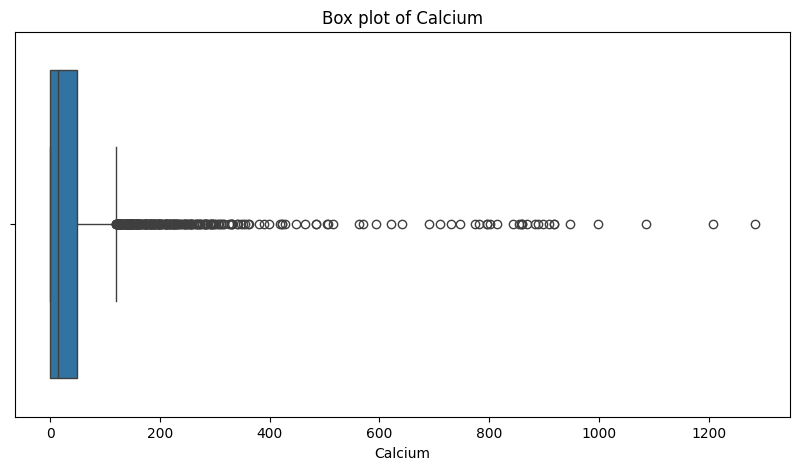

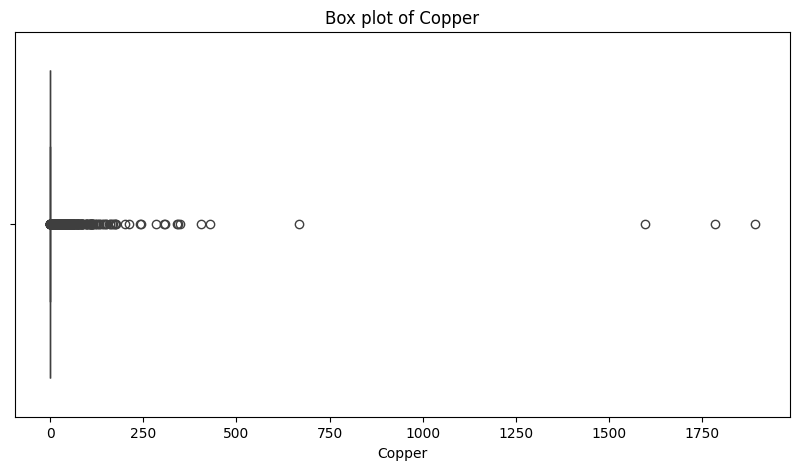

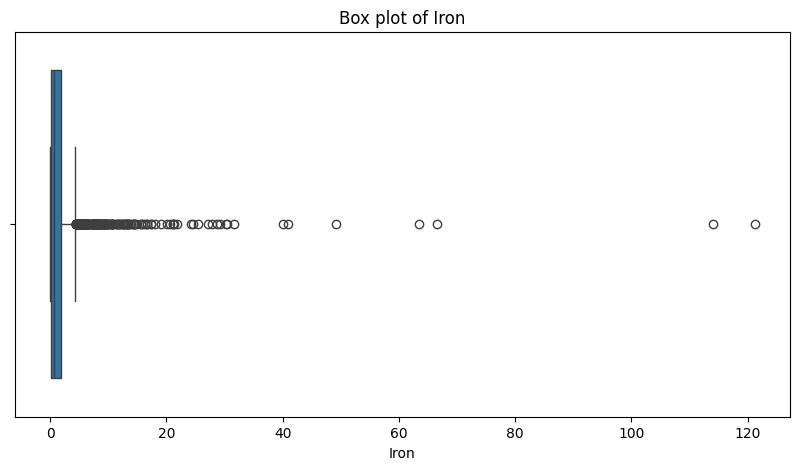

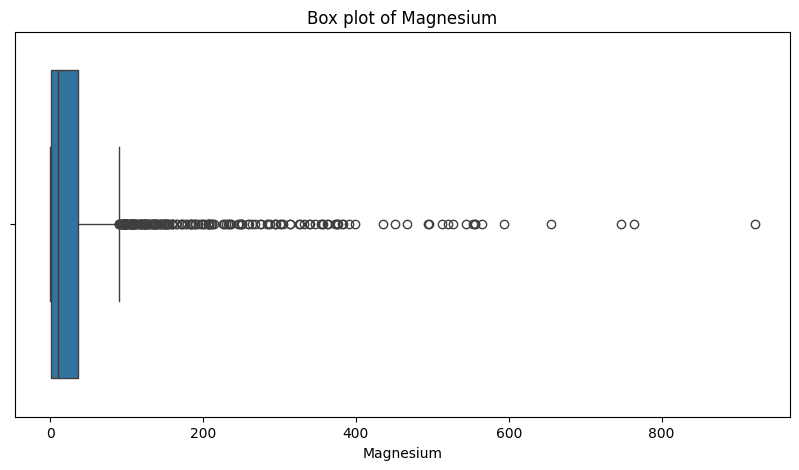

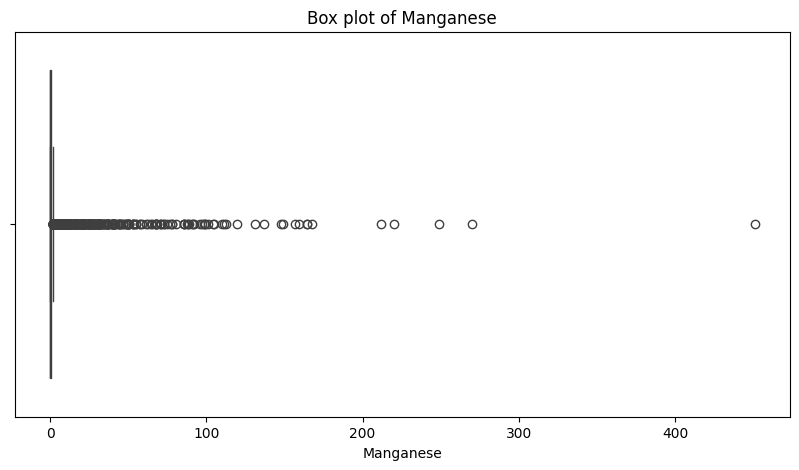

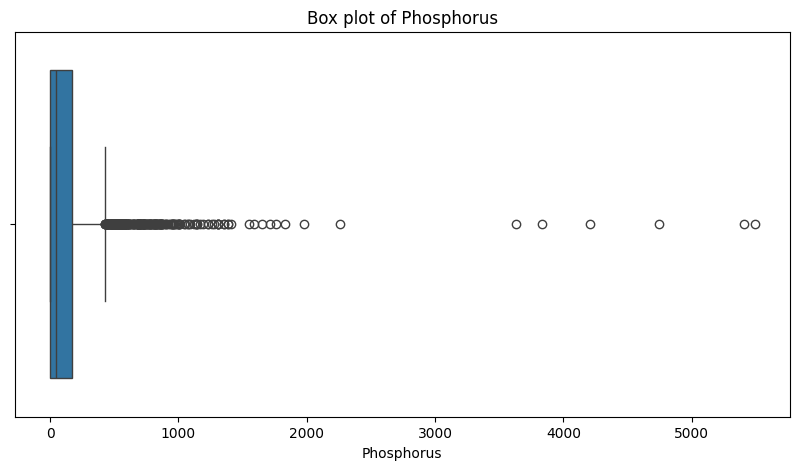

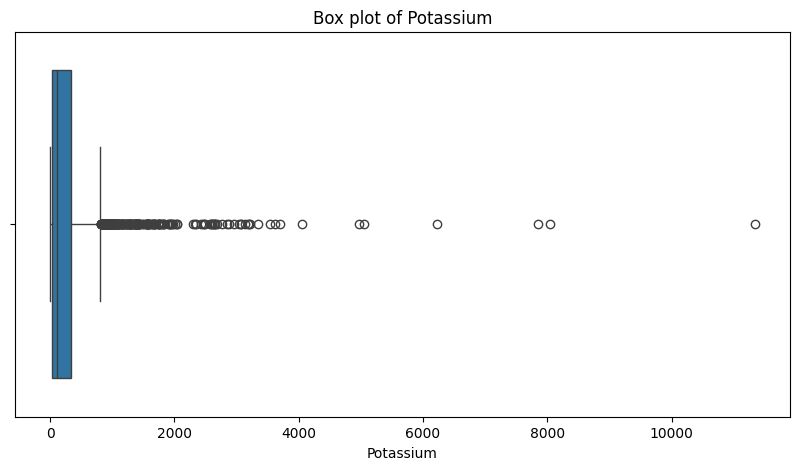

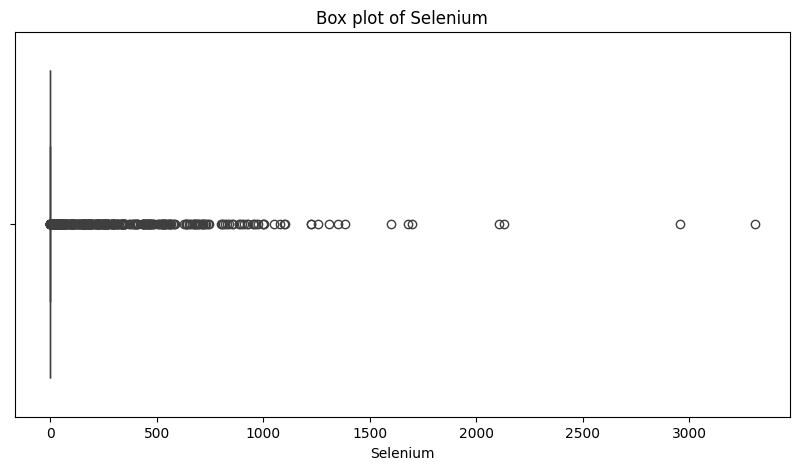

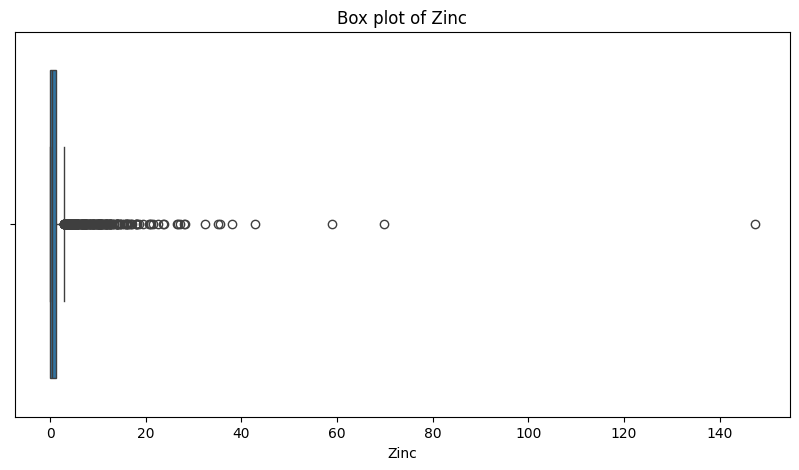

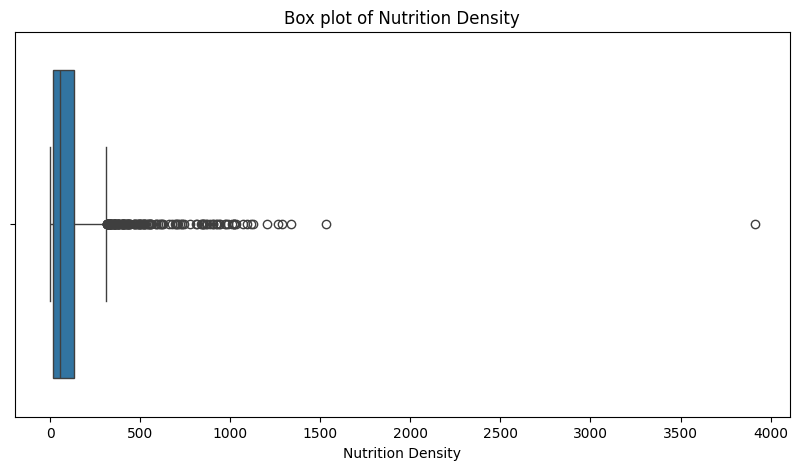

In [ ]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


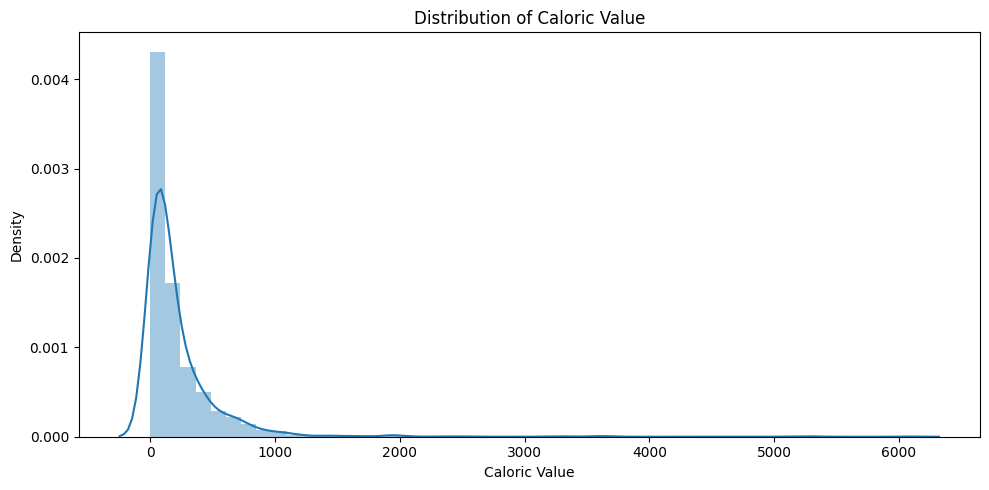

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


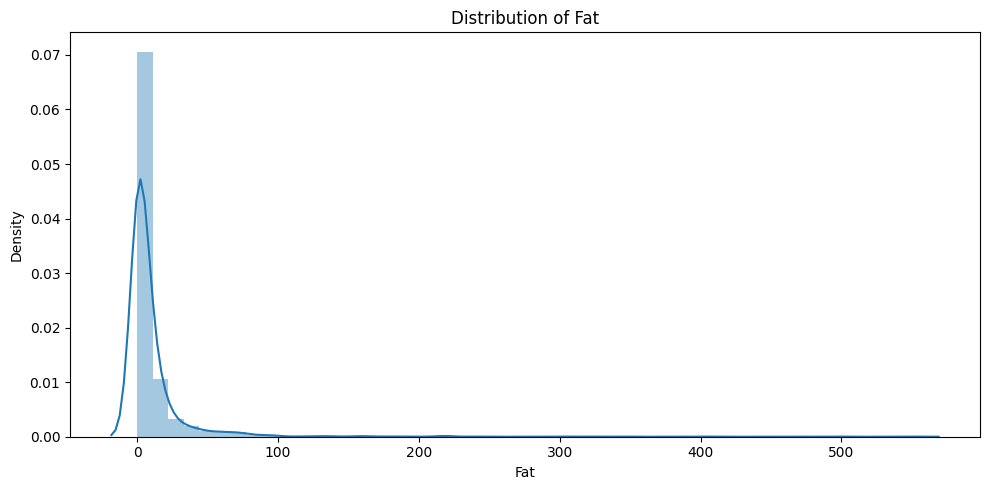

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


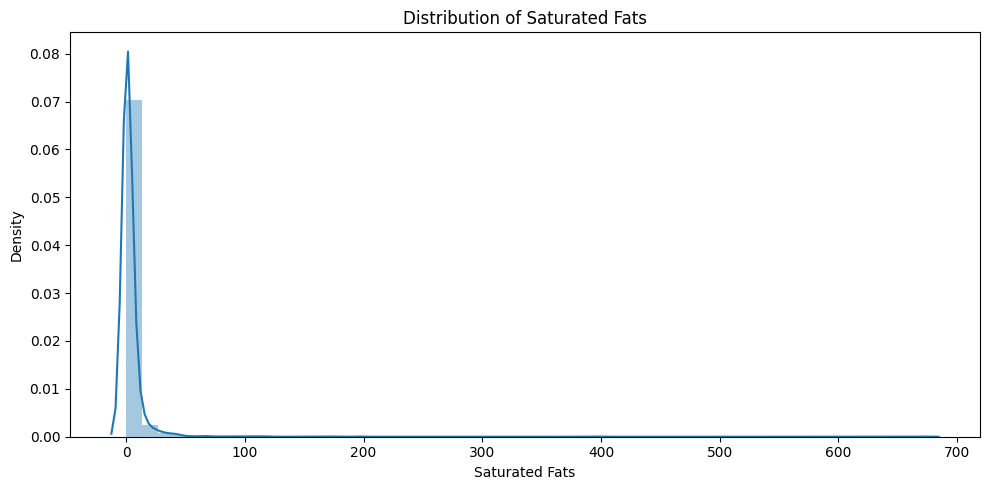

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


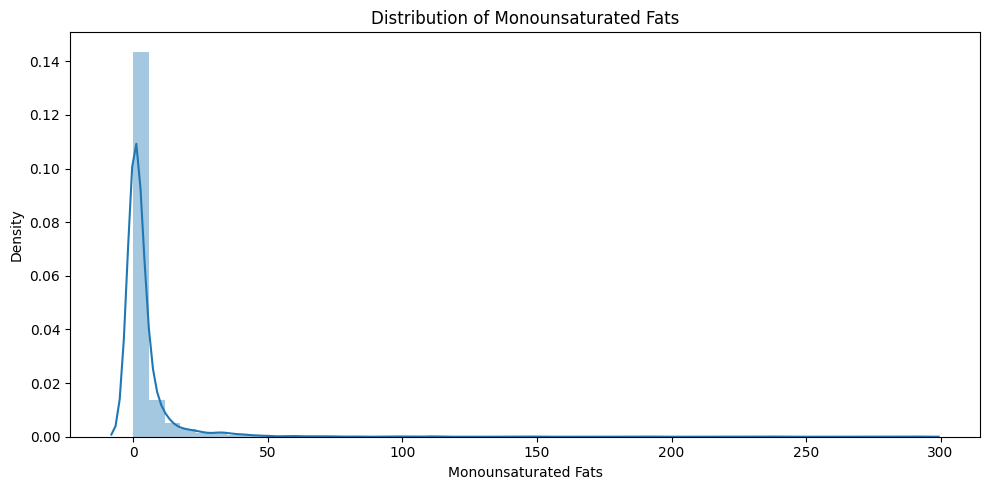

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


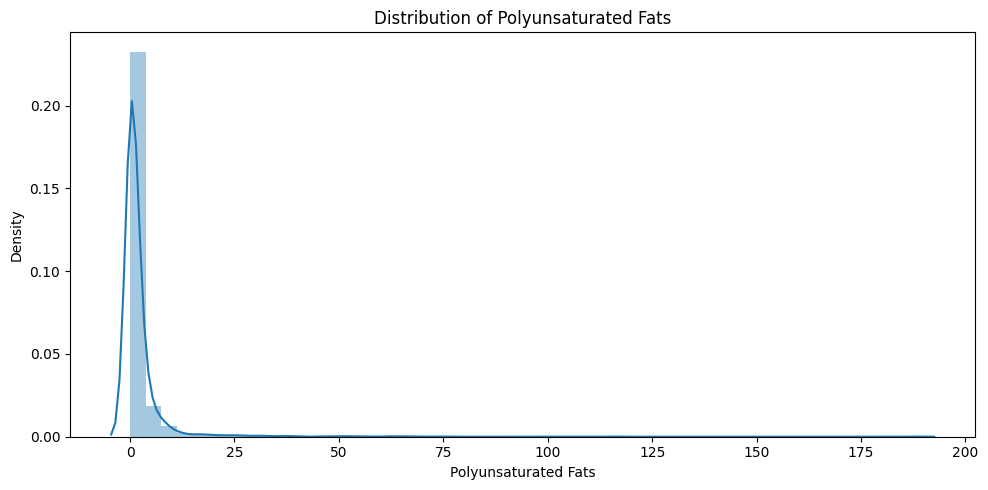

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


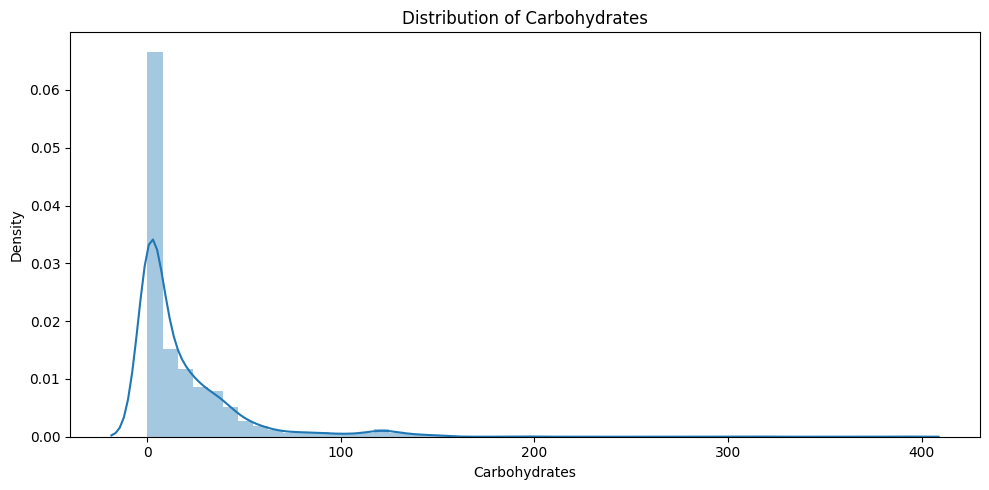

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


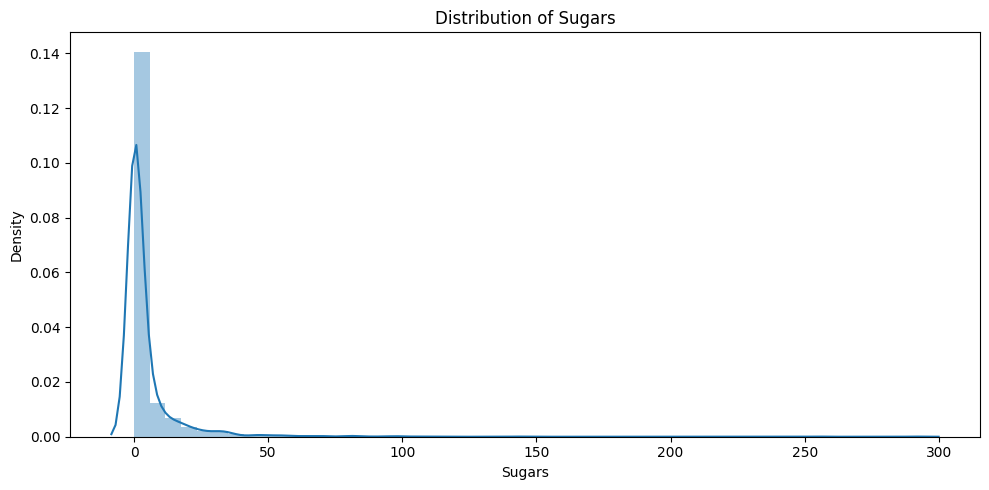

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


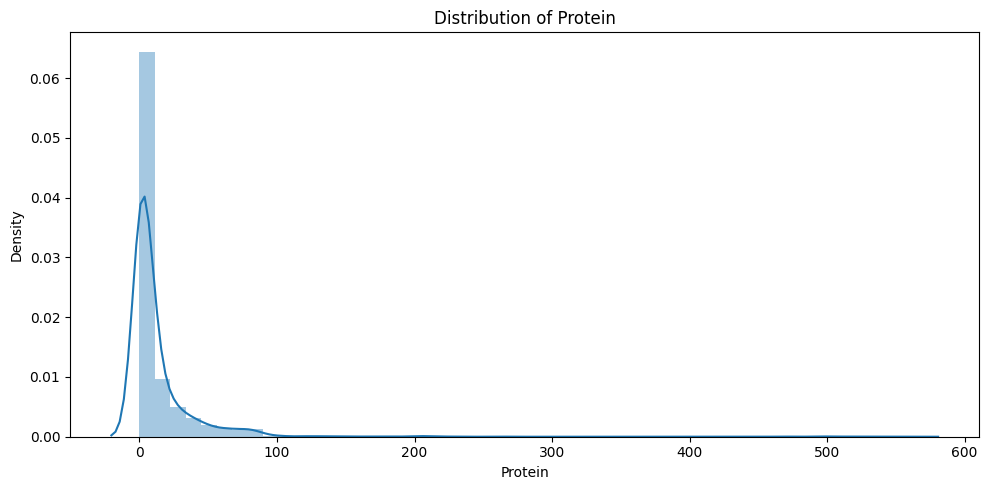

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


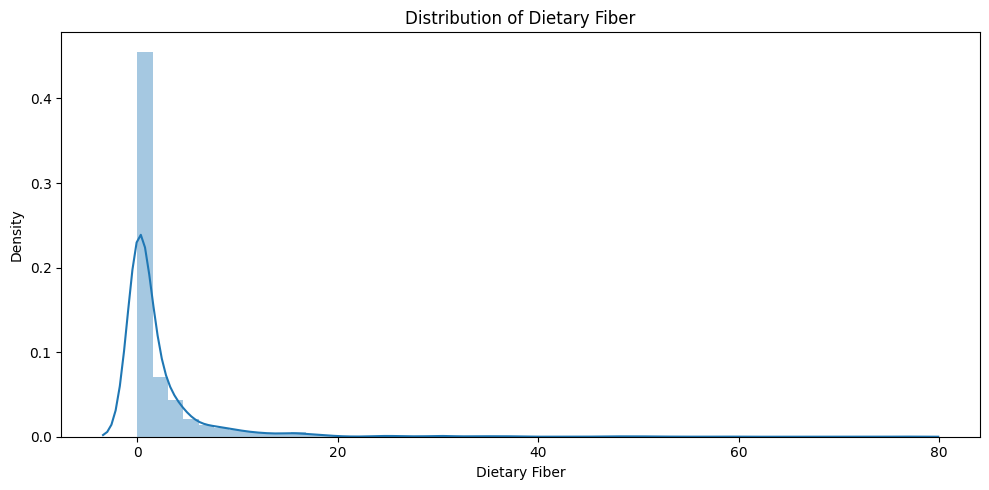

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


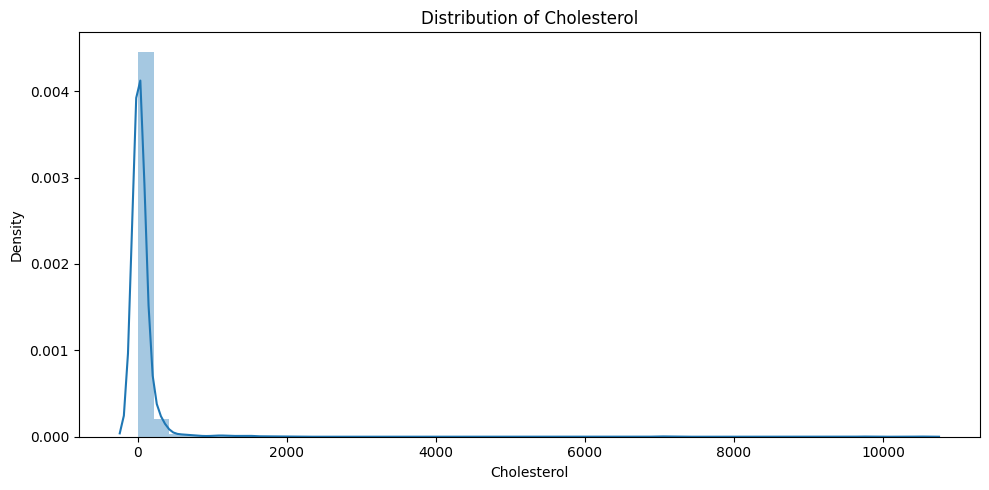

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


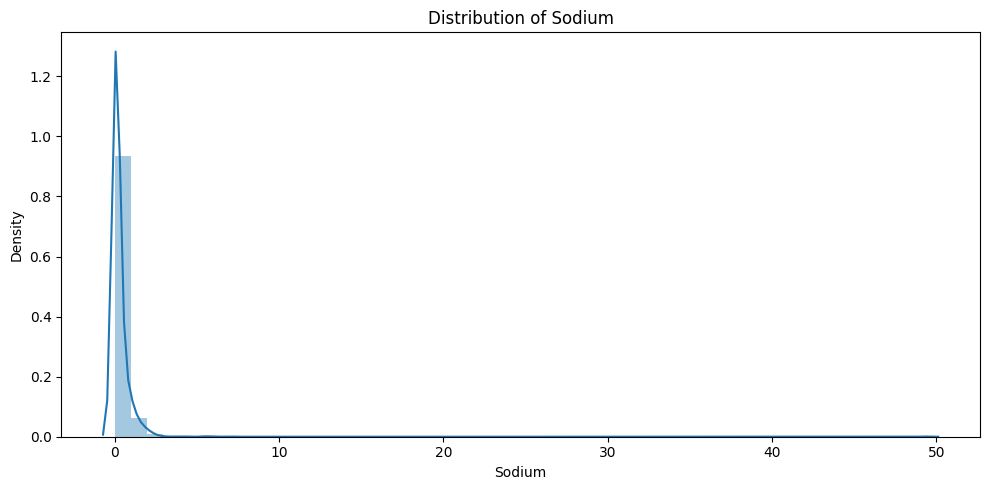

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


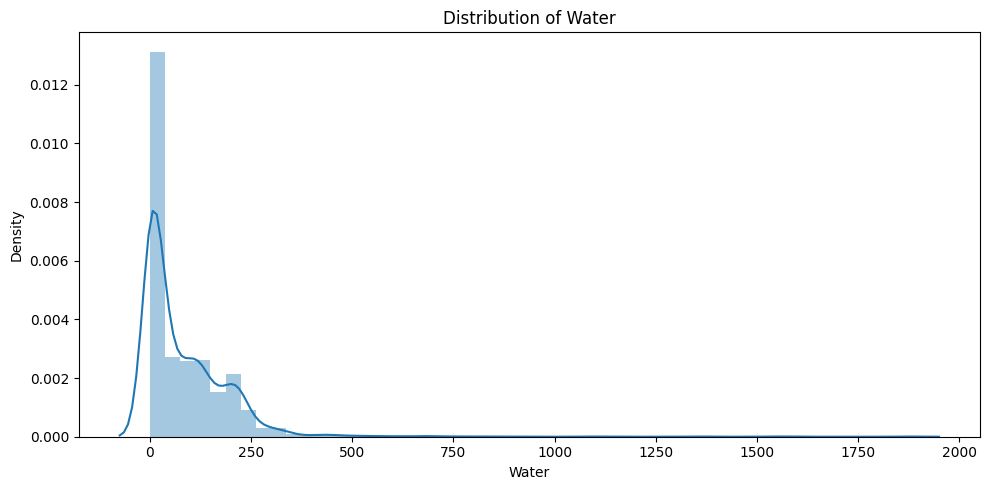

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


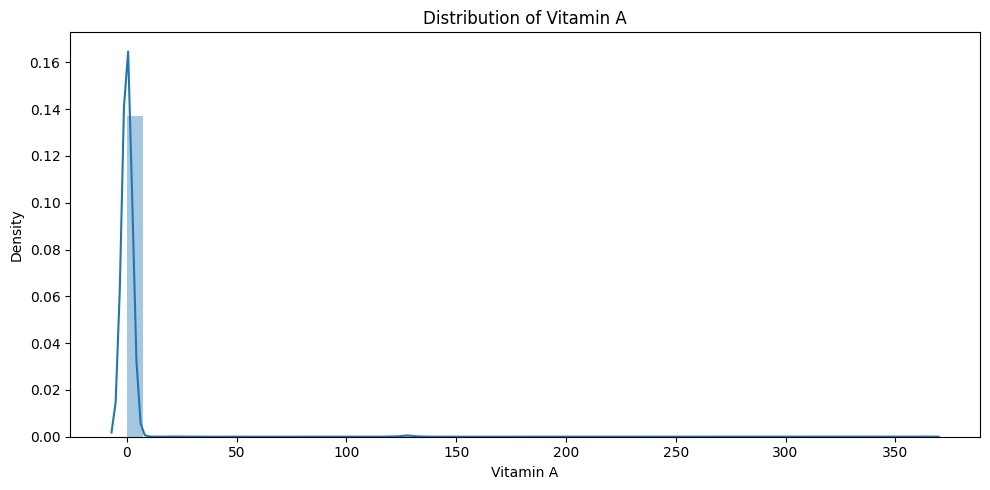

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


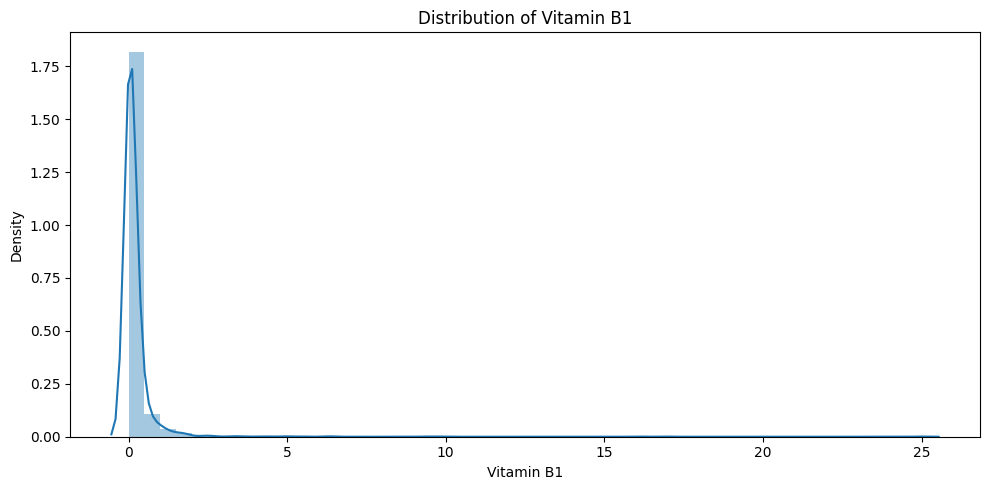

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


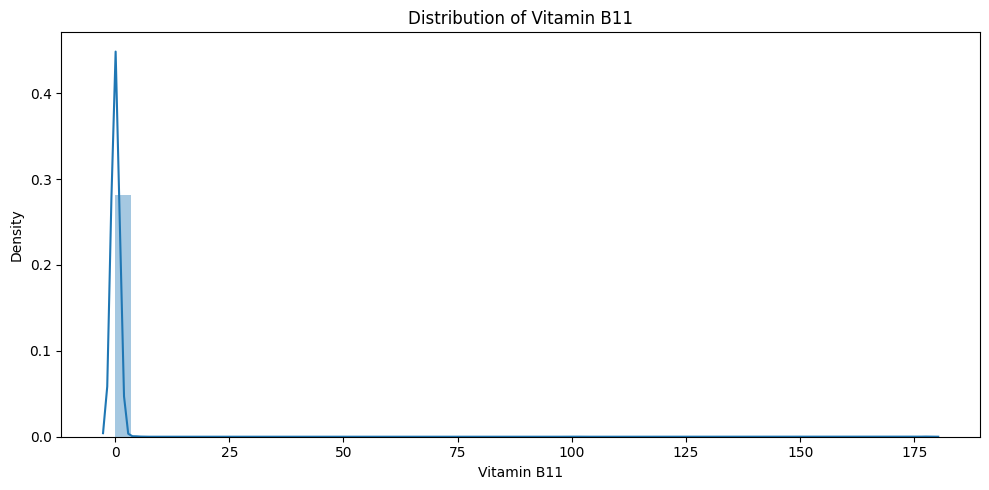

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


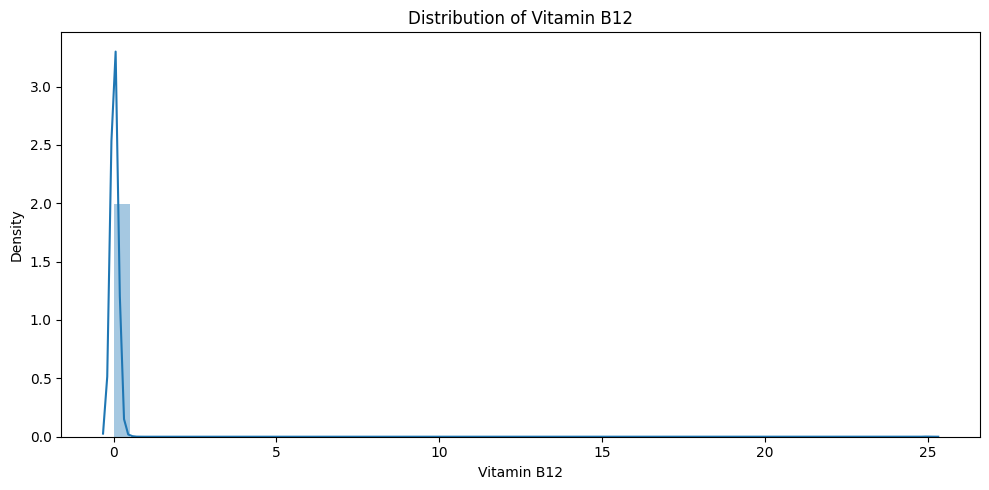

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


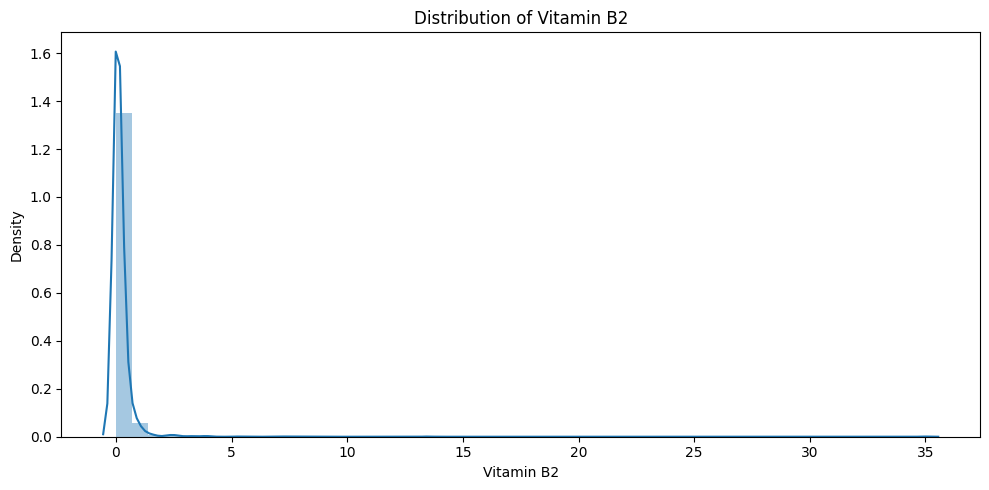

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


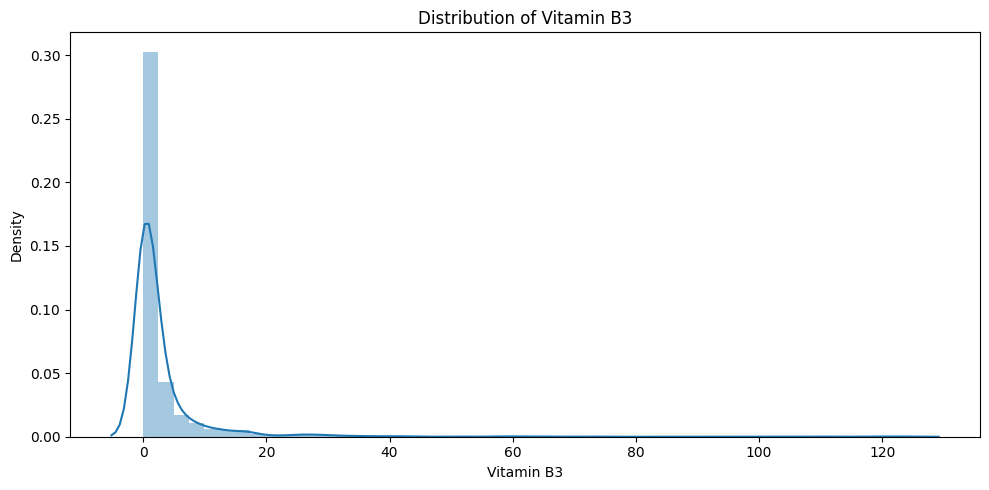

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


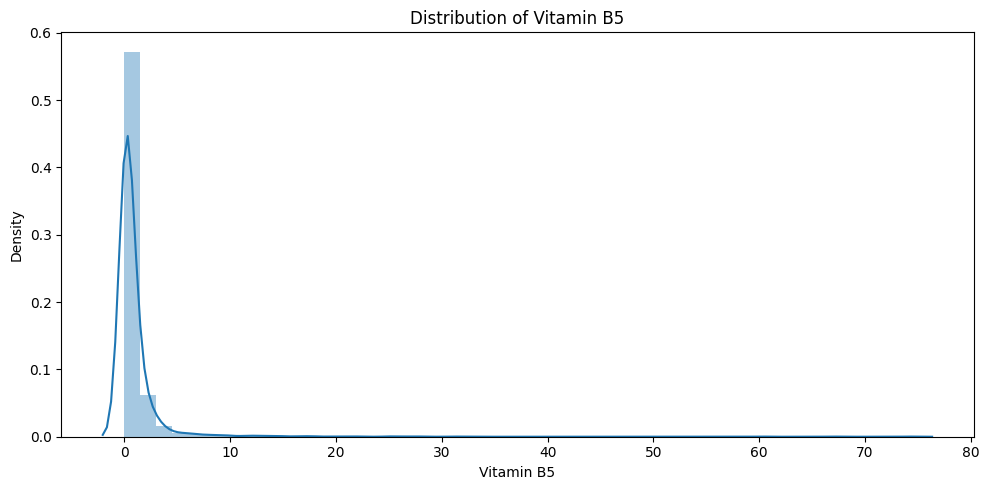

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


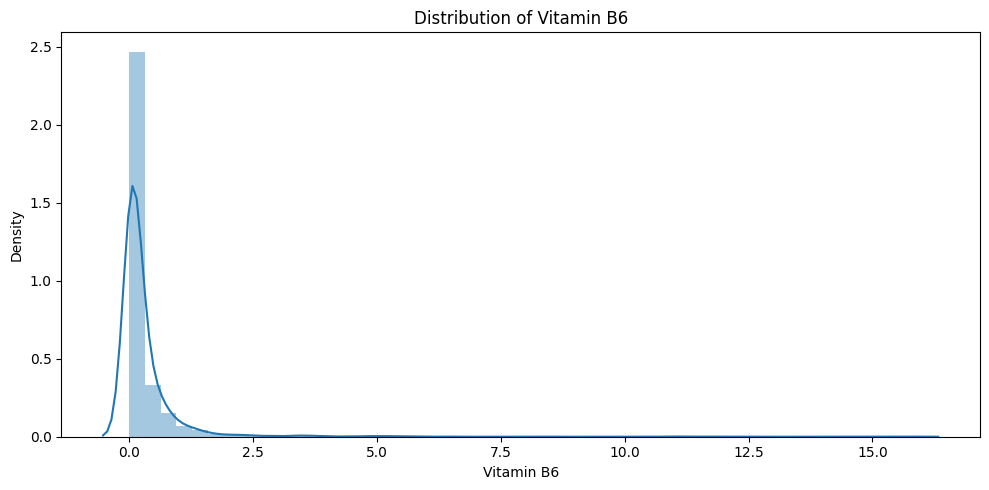

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


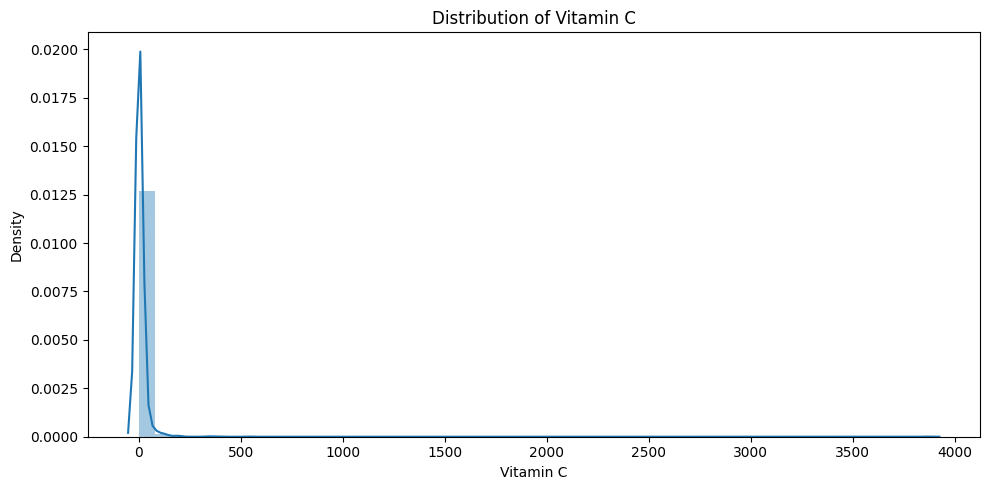

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


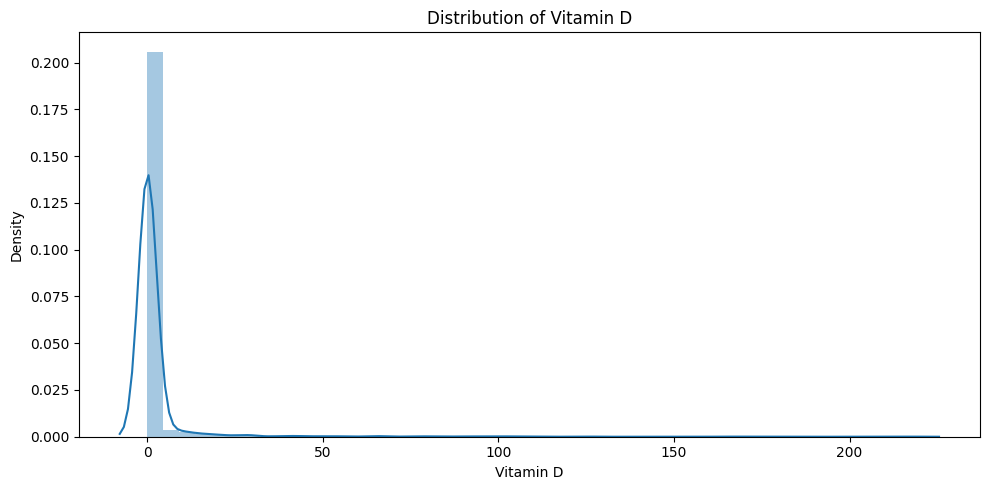

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


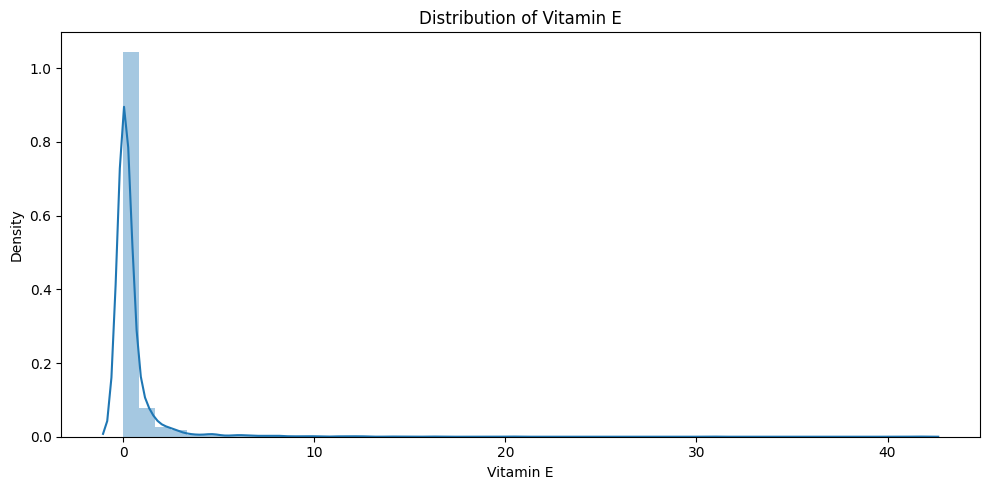

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


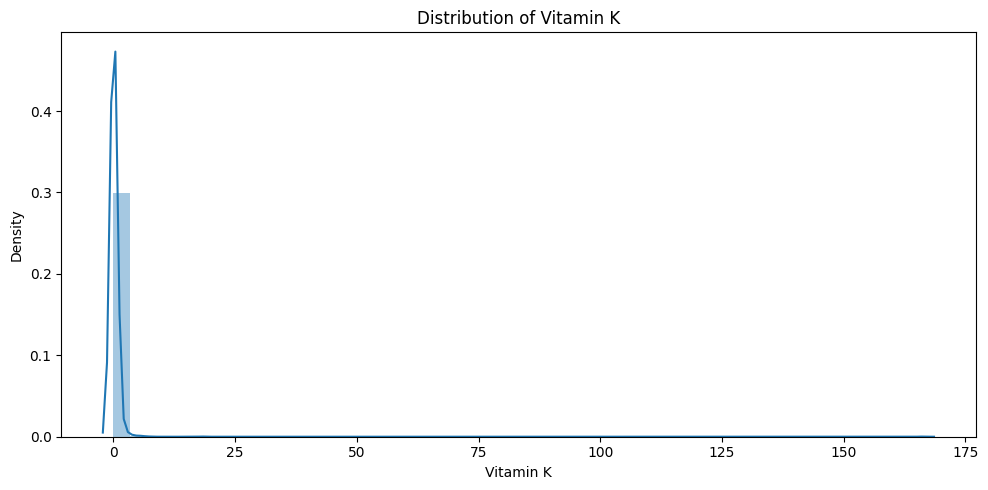

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


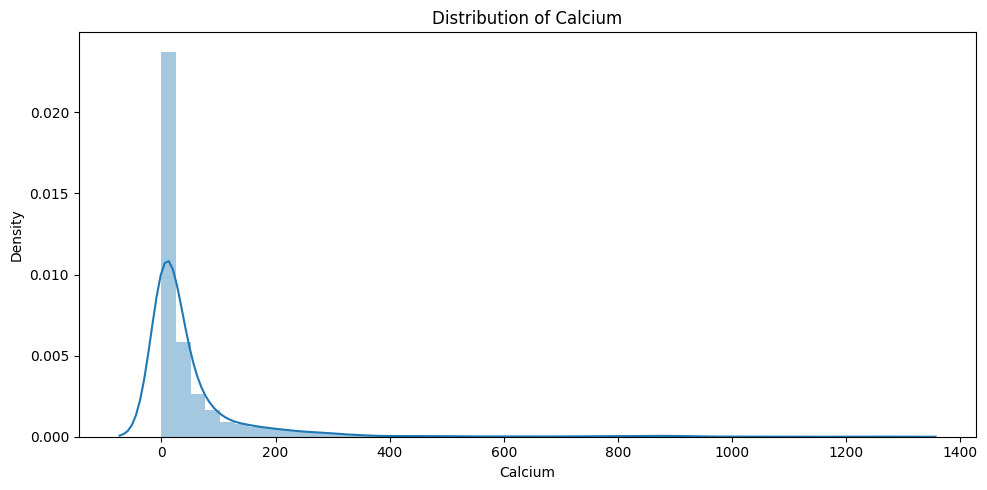

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


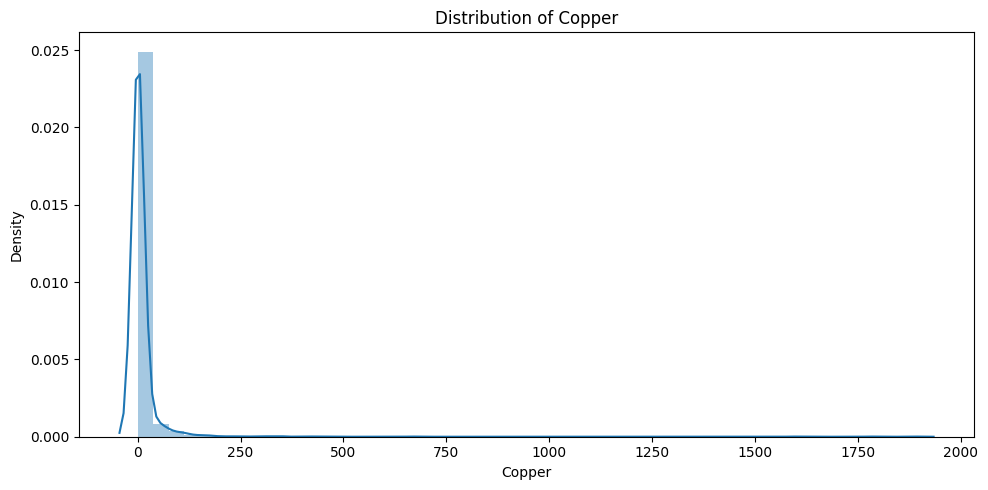

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


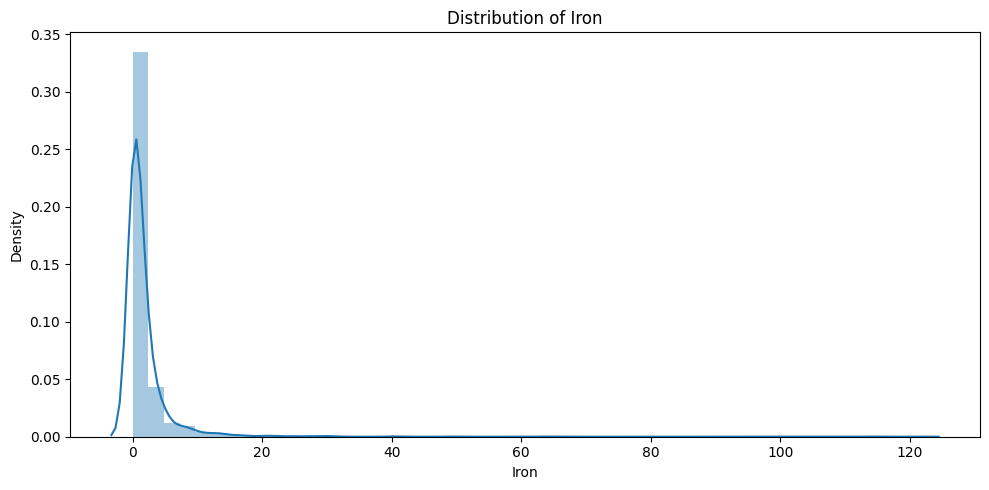

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


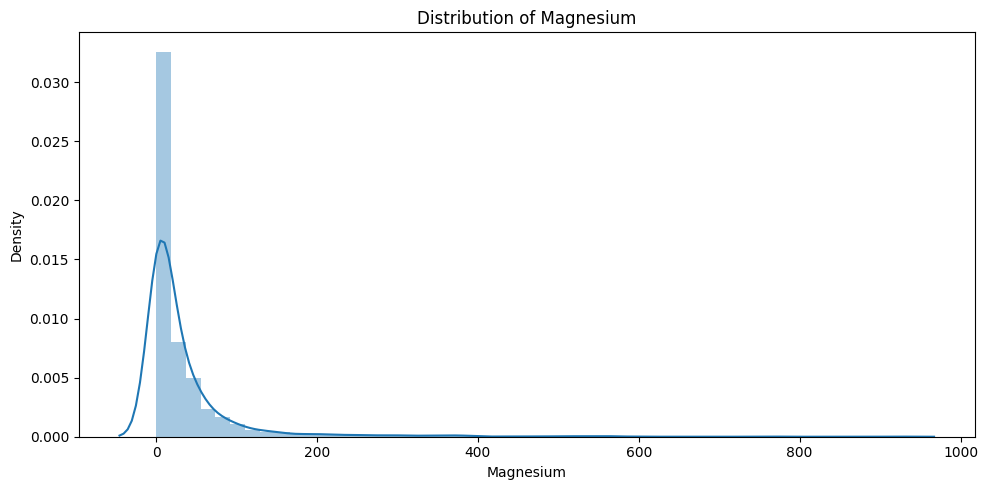

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


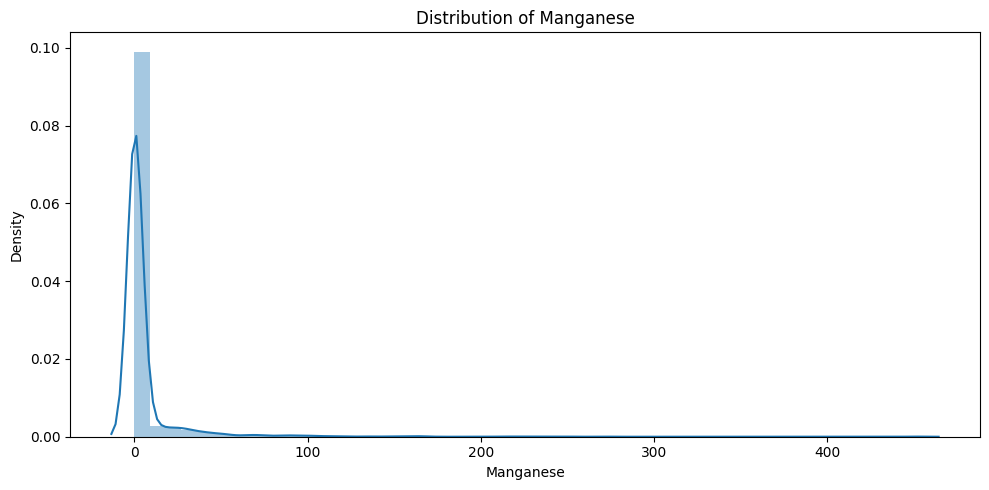

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


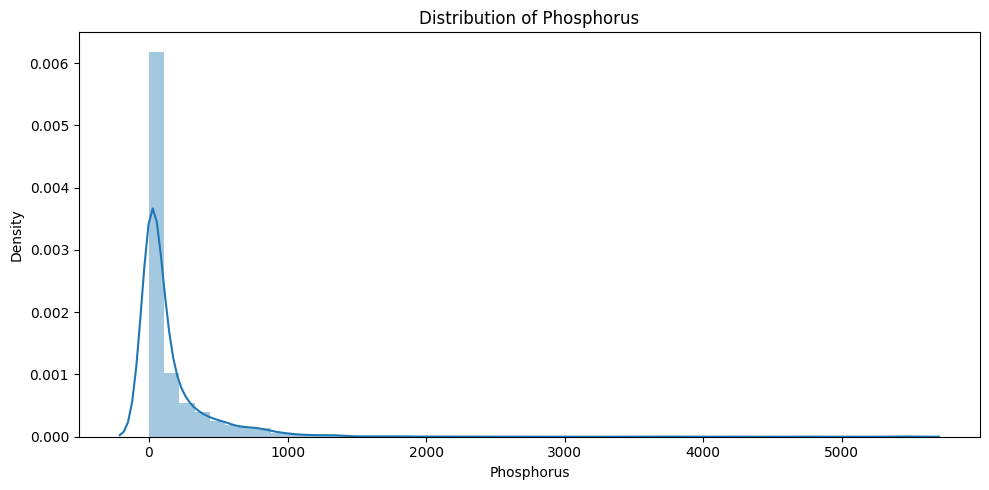

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


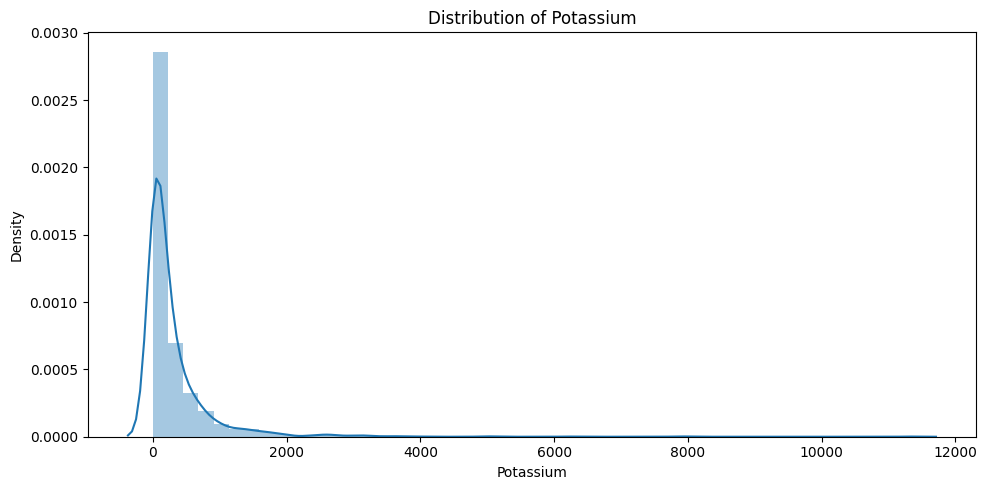

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


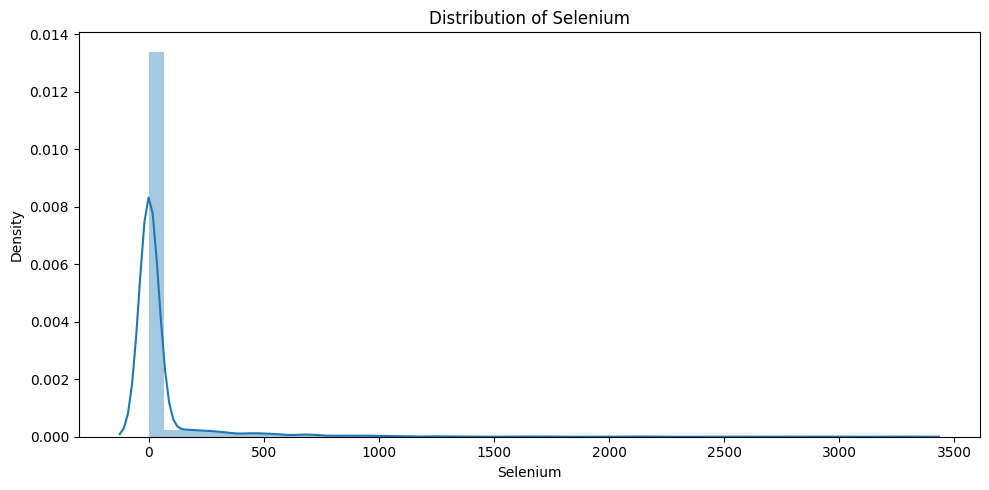

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


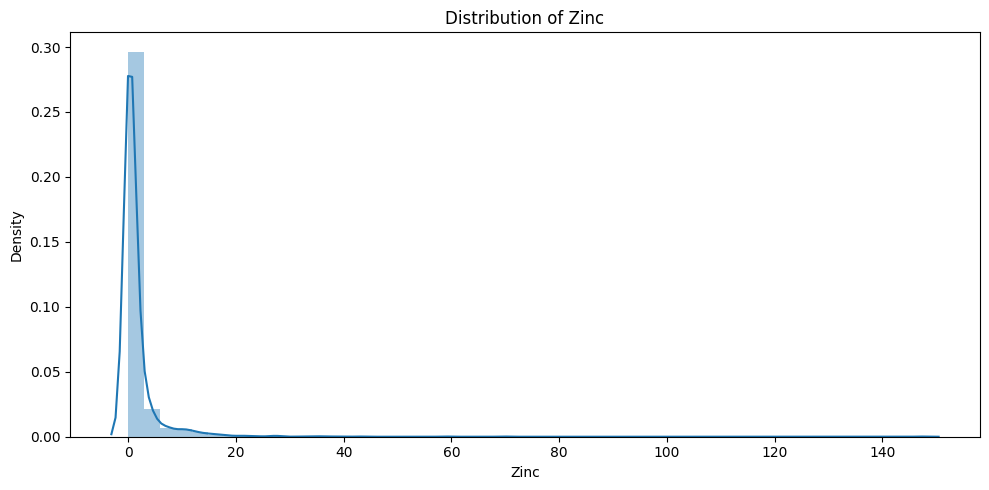

<ipython-input-55-dc1b61928e33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


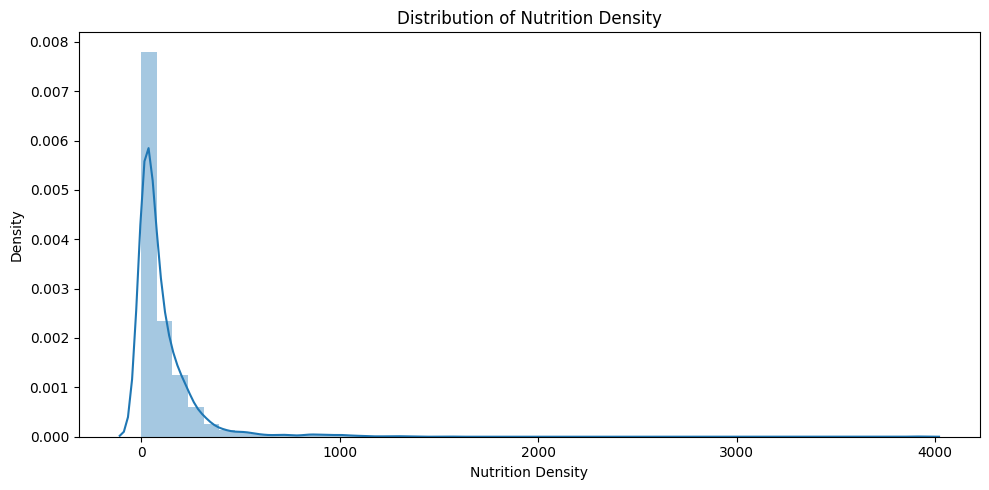

In [ ]:
for column in df.columns:
    try:
      plt.figure(figsize=(10, 5))
      sns.distplot(df[column])
      plt.title(f'Distribution of {column}')
      plt.tight_layout()
      plt.show()
    except:
      pass

In [ ]:
df

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,0.0,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,0.0,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,0.0,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,0.0,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [ ]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
threshold =13
outliers = np.where(z_scores > threshold)

In [ ]:
print(f"Outlier rows: {outliers[0]}")


Outlier rows: [ 262  501  594  594  622  632  781  815  945  999 1023 1023 1023 1056
 1068 1293 1298 1305 1313 1315 1319 1322 1331 1338 1338 1338 1338 1371
 1371 1373 1373 1373 1373 1373 1373 1373 1373 1375 1375 1375 1375 1375
 1375 1384 1384 1388 1394 1394 1405 1405 1429 1429 1436 1436 1436 1437
 1437 1465 1476 1476 1476 1476 1542 1542 1580 1666 1709 1720 1942 2096
 2222]


In [ ]:
outlier_rows= """[ 262  501  594  594  622  632  781  815  945  999 1023 1023 1023 1056
 1068 1293 1298 1305 1313 1315 1319 1322 1331 1338 1338 1338 1338 1371
 1371 1373 1373 1373 1373 1373 1373 1373 1373 1375 1375 1375 1375 1375
 1375 1384 1384 1388 1394 1394 1405 1405 1429 1429 1436 1436 1436 1437
 1437 1465 1476 1476 1476 1476 1542 1542 1580 1666 1709 1720 1942 2096
 2222]"""

In [ ]:
outlier_rows = outlier_rows[1:-1]
outlier_list = outlier_rows.split()
# outlier_list = list([int(i) for i in outlier_list])
outlier_list = list(map(int , outlier_list))
outlier_list

[262,
 501,
 594,
 594,
 622,
 632,
 781,
 815,
 945,
 999,
 1023,
 1023,
 1023,
 1056,
 1068,
 1293,
 1298,
 1305,
 1313,
 1315,
 1319,
 1322,
 1331,
 1338,
 1338,
 1338,
 1338,
 1371,
 1371,
 1373,
 1373,
 1373,
 1373,
 1373,
 1373,
 1373,
 1373,
 1375,
 1375,
 1375,
 1375,
 1375,
 1375,
 1384,
 1384,
 1388,
 1394,
 1394,
 1405,
 1405,
 1429,
 1429,
 1436,
 1436,
 1436,
 1437,
 1437,
 1465,
 1476,
 1476,
 1476,
 1476,
 1542,
 1542,
 1580,
 1666,
 1709,
 1720,
 1942,
 2096,
 2222]

In [ ]:
df = df.drop(outlier_list)
df = df.reset_index(drop=True)

In [ ]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)

X_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.0013818892950731934
0.9999999160229689


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code)

# Predict and evaluate
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Instead of confusion matrix, consider metrics for regression:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.0013818892950731934
0.9999999160229689
0.02123561385194704


In [ ]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

604.048985390809
0.9632921098334477


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

761.1063512016985
0.9537477770500656


In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

724.3215033301436
0.955983182105152


In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


9483.194688242133
0.423708875499882


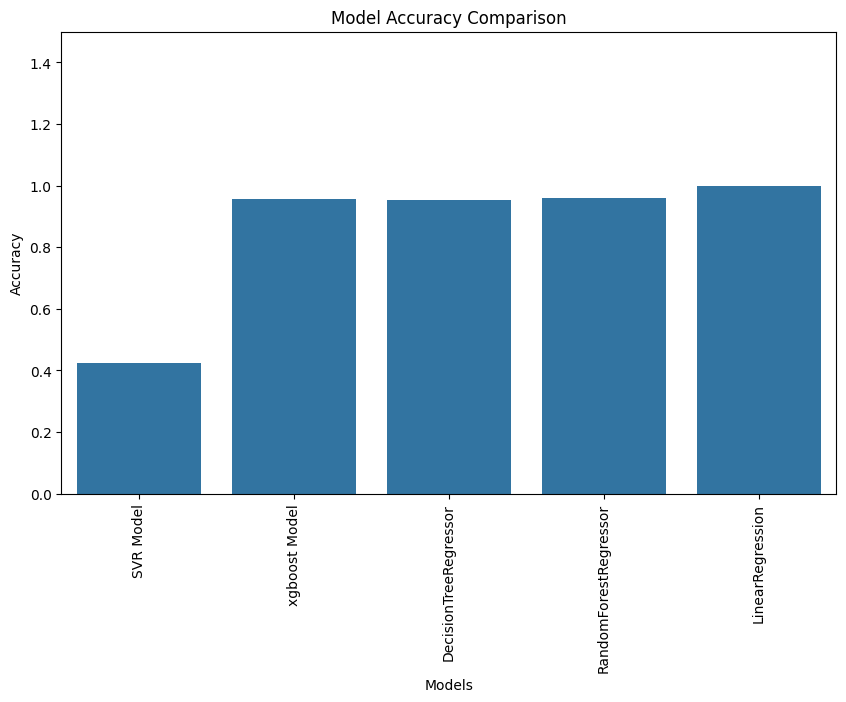

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'accuracy' and 'evaluate' are available as lists or arrays
# Replace with the actual data if they are named differently or stored differently
accuracy = [0.423,0.955 , 0.953, 0.96, 0.999]  # Example accuracy data
evaluate = ['SVR Model', 'xgboost Model', 'DecisionTreeRegressor', 'RandomForestRegressor', 'LinearRegression']  # Example model names

# Create a bar plot for accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=evaluate, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.ylim(0, 1.5)
plt.show()